# A Practical Overview of Classifiction Algorithms

## Data set of Digit number recognition 
-  Data set is made of 8x8 images of digits
    - we start with loading dataset

In [1]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn import tree

# The digits dataset
digits = datasets.load_digits()

-  Now let's have a look at some of the first images, stored in the images attribute of the dataset
    -   If we were working from image files, we could load them using matplotlib.pyplot.imread. Note that each image must have the same size. For these images, we know which digit they represent: it is given in the 'target' of the dataset.


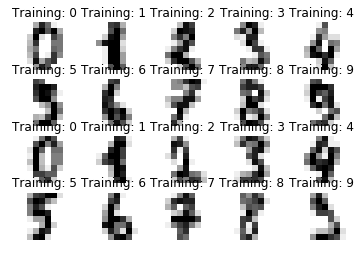

In [2]:
# The digits dataset
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(4, 5, index + 1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r)
    plt.title('Training: %i' % label)
plt.show()

-  We need to do some preprocessing!

In [5]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


-  Now it is the time to see what our classification algorithms do

In [8]:
# Create a classifier: 

classifier = MLPClassifier(hidden_layer_sizes=(100,))

# We learn the digits on the first half of the digits
classifier.fit(data[:9*(n_samples) // 10], digits.target[:9*(n_samples) // 10])

# Now predict the value of the digit on the second half:
expected = digits.target[9*(n_samples) // 10:]
predicted = classifier.predict(data[9*(n_samples) // 10:])



-  Lets show the predictions :) 

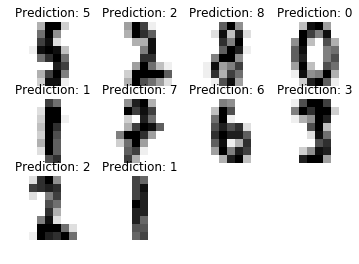

In [9]:
images_and_predictions = list(zip(digits.images[9*(n_samples) // 10:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(3, 4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Prediction: %i' % prediction)

plt.show()

-  You can use evaluation metrics to compare your classifications

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
